In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
# from sklearn.model_selection import StandardScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('../data/emg_sensor3.csv')

In [3]:
df

,ch1_voltage,ch2_voltage,ch3_voltage,label
0,0.51,0.79,0.64,1
1,0.51,0.62,0.55,1
2,0.47,0.12,0.49,1
3,0.19,0.50,0.78,1
4,0.90,0.67,0.74,1
...,...,...,...,...
1995,1.02,1.28,0.47,2
1996,0.30,0.79,0.60,2
1997,0.42,0.71,0.43,2
1998,0.88,0.11,0.77,2


In [4]:
df.head(5)

,ch1_voltage,ch2_voltage,ch3_voltage,label
0,0.51,0.79,0.64,1
1,0.51,0.62,0.55,1
2,0.47,0.12,0.49,1
3,0.19,0.50,0.78,1
4,0.90,0.67,0.74,1


In [5]:
x=df.drop(columns=['label'],axis='columns')

In [6]:
x

,ch1_voltage,ch2_voltage,ch3_voltage
0,0.51,0.79,0.64
1,0.51,0.62,0.55
2,0.47,0.12,0.49
3,0.19,0.50,0.78
4,0.90,0.67,0.74
...,...,...,...
1995,1.02,1.28,0.47
1996,0.30,0.79,0.60
1997,0.42,0.71,0.43
1998,0.88,0.11,0.77


In [7]:
y=df['label']

In [8]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    2
1996    2
1997    2
1998    2
1999    2
Name: label, Length: 2000, dtype: int64

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
X_train

,ch1_voltage,ch2_voltage,ch3_voltage
968,0.14,0.36,0.60
240,0.71,0.16,0.14
819,0.97,0.58,0.32
692,1.06,0.76,0.66
420,0.22,0.17,0.51
...,...,...,...
1130,0.29,0.28,0.45
1294,0.13,0.68,0.37
860,0.24,0.17,0.74
1459,1.01,0.84,1.25


In [11]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [12]:
y_pred = gb_model.predict(X_test)

In [13]:
print(f"Gradient Boosting Accuracy: {accuracy_score(Y_test, y_pred):.2f}")

Gradient Boosting Accuracy: 0.73


In [14]:
# from lightgbm import LGBMClassifier
# model = LGBMClassifier(random_state=42)

In [15]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)

In [17]:
import sys
!{sys.executable} -m pip install lightgbm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)

In [19]:
model.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 799, number of negative: 801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499375 -> initscore=-0.002500
[LightGBM] [Info] Start training from score -0.002500


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [20]:
y_pred = model.predict(X_test)

In [21]:
print(f"Boosting Accuracy: {accuracy_score(Y_test, y_pred):.2f}")

Boosting Accuracy: 0.75


In [22]:
import sys
!{sys.executable} -m pip install catboost


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0, random_state=42) # verbose=0 keeps it quiet

In [24]:
model.fit(X_train,Y_train)

In [25]:
y_pred=model.predict(X_test)

In [26]:
print(f"Boosting Accuracy: {accuracy_score(Y_test, y_pred):.2f}")

Boosting Accuracy: 0.74


In [27]:
from catboost import CatBoostClassifier


In [28]:
model = CatBoostClassifier(
    iterations=5000,                  # Increased iterations for the large dataset
    learning_rate=0.05,
    depth=5,                          # Reduced depth for the low number of features
    l2_leaf_reg=3,                    # Standard regularization
    verbose=500,                      # Print progress every 500 iterations
    early_stopping_rounds=100,        # Increased patience for early stopping
    random_state=42
)


In [29]:
# model.fit(X_test,X_train)
# Correct
model.fit(X_train, Y_train)

0:	learn: 0.6780223	total: 3.68ms	remaining: 18.4s
500:	learn: 0.3538814	total: 1.17s	remaining: 10.5s
1000:	learn: 0.2522992	total: 2.36s	remaining: 9.43s
1500:	learn: 0.1906170	total: 3.49s	remaining: 8.13s
2000:	learn: 0.1484896	total: 4.7s	remaining: 7.04s
2500:	learn: 0.1190922	total: 5.84s	remaining: 5.84s
3000:	learn: 0.0973688	total: 7.21s	remaining: 4.8s
3500:	learn: 0.0807711	total: 8.51s	remaining: 3.65s
4000:	learn: 0.0685911	total: 9.94s	remaining: 2.48s
4500:	learn: 0.0592864	total: 11.2s	remaining: 1.24s
4999:	learn: 0.0521884	total: 12.3s	remaining: 0us


In [30]:
acc_score=accuracy_score(Y_test,y_pred)
acc_score

0.74

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# --- 1. DATA LOADING ---
print("Step 1: Loading data from '../data/emg_sensor3.csv'...")
try:
    file_path = '../data/emg_sensor3.csv'
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"\nERROR: The file '{file_path}' was not found.")
    exit()

X = df.drop('label', axis=1)
y = df['label']
print("\nFeatures (X) and target (y) have been separated.\n")


# --- 2. INITIAL TRAIN-TEST SPLIT ---
print("Step 2: Splitting data into training (80%) and testing (20%) sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}\n")


# --- 3. ADVANCED FEATURE ENGINEERING ---
print("Step 3: Performing Advanced Feature Engineering...")
def engineer_features(df):
    df_eng = df.copy()
    feature_names = df.columns
    
    # Simple interactions
    df_eng['v1_x_v2'] = df_eng[feature_names[0]] * df_eng[feature_names[1]]
    df_eng['v2_x_v3'] = df_eng[feature_names[1]] * df_eng[feature_names[2]]
    df_eng['v1_x_v3'] = df_eng[feature_names[0]] * df_eng[feature_names[2]]
    
    # Polynomial features
    df_eng['v1_sq'] = df_eng[feature_names[0]]**2
    df_eng['v2_sq'] = df_eng[feature_names[1]]**2
    
    # Row-wise statistical features
    df_eng['voltage_mean'] = df_eng[feature_names].mean(axis=1)
    df_eng['voltage_std'] = df_eng[feature_names].std(axis=1)
    df_eng['voltage_range'] = df_eng[feature_names].max(axis=1) - df_eng[feature_names].min(axis=1)
    
    return df_eng

X_train_eng = engineer_features(X_train)
X_test_eng = engineer_features(X_test)
print(f"Data shape after feature engineering: {X_train_eng.shape}\n")


# --- 4. DATA SCALING ---
print("Step 4: Scaling the engineered features...")
scaler = StandardScaler()
scaler.fit(X_train_eng)
X_train_scaled = scaler.transform(X_train_eng)
X_test_scaled = scaler.transform(X_test_eng)
print("Data has been successfully scaled.\n")


# --- 5. BASELINE MODEL: RANDOM FOREST ---
print("Step 5: Training a default Random Forest for comparison...")
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"-> Baseline Random Forest Accuracy: {rf_accuracy:.4f}\n")


# --- 6. HYPERPARAMETER TUNING FOR CATBOOST ---
print("Step 6: Searching for the best CatBoost parameters with RandomizedSearchCV...")

# Define the parameter distribution for the search
param_dist = {
    'iterations': [1000, 1500, 2000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 5, 6, 7],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.5, 0.8, 1.0] # Adds randomness
}

# Initialize the model
cat_model = CatBoostClassifier(random_state=42, verbose=0)

# Set up the search
# n_iter=20 means it will try 20 different combinations of parameters.
# cv=3 means it will use 3-fold cross-validation for each combination.
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)

# Run the search on the scaled training data
random_search.fit(X_train_scaled, y_train)

print("\nBest parameters found:", random_search.best_params_)
best_cat_model = random_search.best_estimator_

# Evaluate the BEST model found by the search
cat_predictions = best_cat_model.predict(X_test_scaled)
cat_accuracy = accuracy_score(y_test, cat_predictions)
print(f"-> Tuned CatBoost Accuracy: {cat_accuracy:.4f}\n")


# --- 7. FINAL COMPARISON ---
print("---" * 15)
print("              FINAL RESULTS")
print("---" * 15)
print(f"Baseline Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Tuned CatBoost Accuracy:         {cat_accuracy:.4f}")
print("---" * 15)

if cat_accuracy > 0.90:
    print("\nCongratulations! 🎉 You've reached over 90% accuracy!")
else:
    print("\nGreat progress! If still below 90%, the next step is even more advanced feature engineering or data collection.")

Step 1: Loading data from '../data/emg_sensor3.csv'...
Data loaded successfully.

Features (X) and target (y) have been separated.

Step 2: Splitting data into training (80%) and testing (20%) sets...
Training set shape: (1600, 3)

Step 3: Performing Advanced Feature Engineering...
Data shape after feature engineering: (1600, 11)

Step 4: Scaling the engineered features...
Data has been successfully scaled.

Step 5: Training a default Random Forest for comparison...
-> Baseline Random Forest Accuracy: 0.6825

Step 6: Searching for the best CatBoost parameters with RandomizedSearchCV...

Best parameters found: {'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 6, 'bagging_temperature': 0.5}
-> Tuned CatBoost Accuracy: 0.7200

---------------------------------------------
              FINAL RESULTS
---------------------------------------------
Baseline Random Forest Accuracy: 0.6825
Tuned CatBoost Accuracy:         0.7200
---------------------------------------------

Generating Pairplot...


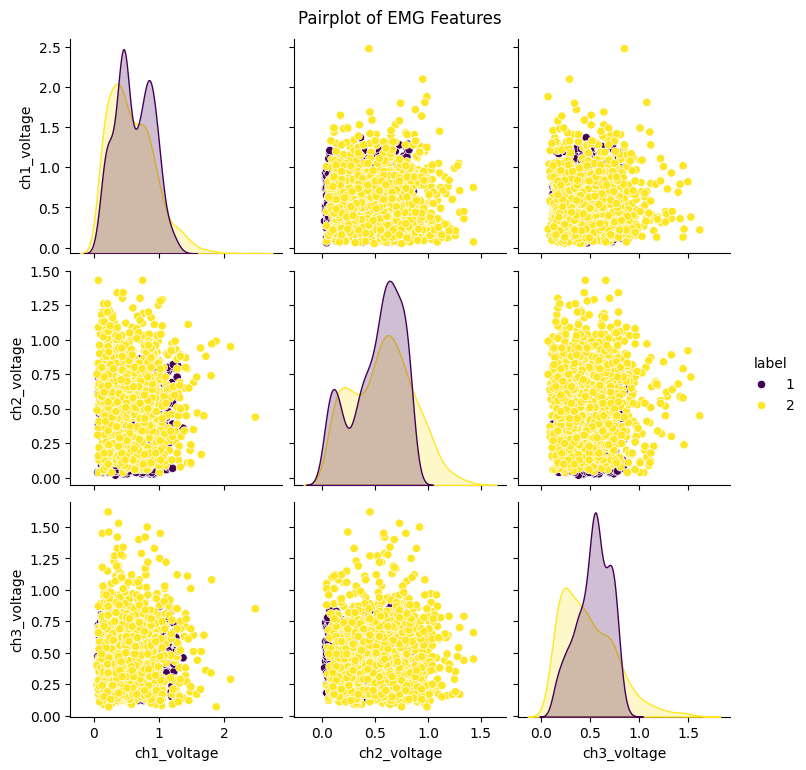


Generating Distribution Plots...


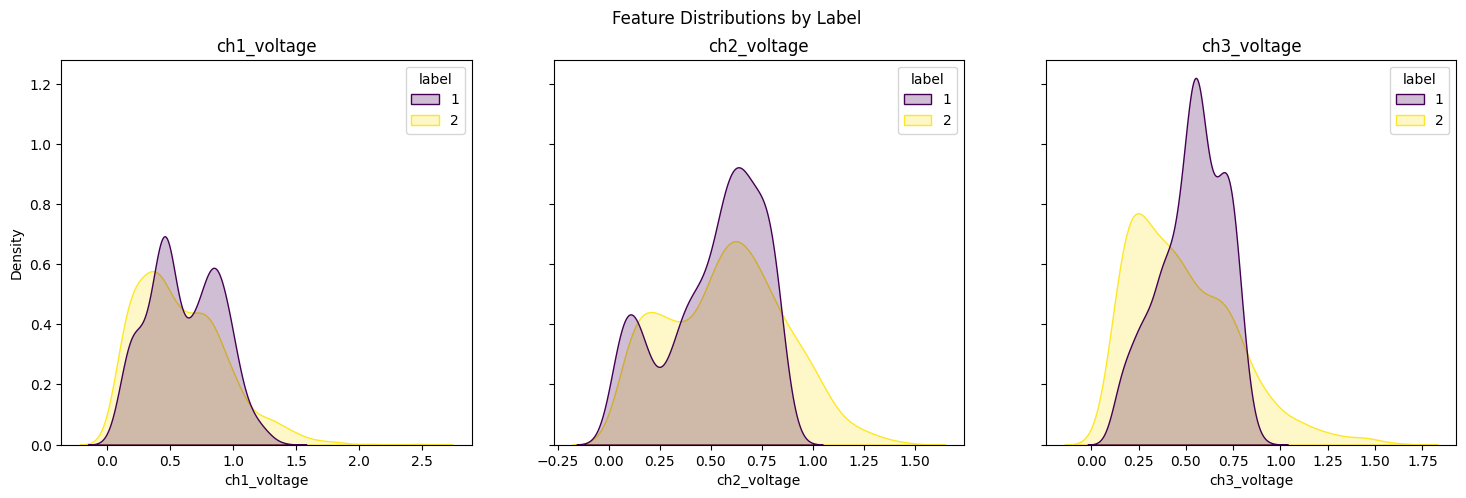

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your original data again
df = pd.read_csv('../data/emg_sensor3.csv')

# --- Plot 1: Pairplot ---
# See the relationships between all features, colored by your label.
# Are there any clear clusters or separations?
print("Generating Pairplot...")
sns.pairplot(df, hue='label', palette='viridis')
plt.suptitle('Pairplot of EMG Features', y=1.02)
plt.show()

# --- Plot 2: Distribution Plots ---
# See how much the classes overlap for each individual feature.
# If the curves overlap a lot, that feature has low predictive power on its own.
print("\nGenerating Distribution Plots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Feature Distributions by Label')

for i, col in enumerate(['ch1_voltage', 'ch2_voltage', 'ch3_voltage']):
    sns.kdeplot(data=df, x=col, hue='label', fill=True, ax=axes[i], palette='viridis')
    axes[i].set_title(col)
plt.show()

In [33]:
import pandas as pd
from scipy import stats
import numpy as np

# Load your original data
df = pd.read_csv('../data/emg_sensor3.csv')

# --- 1. Define Window Parameters ---
window_size = 100  # Analyze 100 rows at a time
step_size = 50     # Slide forward by 50 rows for the next window

# --- 2. Create lists to store the new features and labels ---
processed_features = []
processed_labels = []

# --- 3. Iterate through the data in windows ---
for i in range(0, len(df) - window_size + 1, step_size):
    # Get the current window of data for each channel
    window_ch1 = df['ch1_voltage'].iloc[i: i + window_size]
    window_ch2 = df['ch2_voltage'].iloc[i: i + window_size]
    window_ch3 = df['ch3_voltage'].iloc[i: i + window_size]
    
    # Get the labels for the current window
    label_window = df['label'].iloc[i: i + window_size]
    
    # --- Calculate features for this window ---
    features = {
        'ch1_mean': window_ch1.mean(),
        'ch1_std': window_ch1.std(),
        'ch1_max': window_ch1.max(),
        'ch1_rms': np.sqrt(np.mean(window_ch1**2)), # Root Mean Square
        
        'ch2_mean': window_ch2.mean(),
        'ch2_std': window_ch2.std(),
        'ch2_min': window_ch2.min(),
        'ch2_rms': np.sqrt(np.mean(window_ch2**2)),

        'ch3_mean': window_ch3.mean(),
        'ch3_std': window_ch3.std(),
        'ch3_range': window_ch3.max() - window_ch3.min(),
        'ch3_rms': np.sqrt(np.mean(window_ch3**2)),
    }
    processed_features.append(features)
    
    # --- Determine the label for this window ---
    # We use the mode (most frequent value)
    processed_labels.append(stats.mode(label_window, keepdims=True)[0][0])


# --- 4. Create a new DataFrame from the processed features ---
new_df = pd.DataFrame(processed_features)
new_df['label'] = processed_labels

print("Shape of the new, feature-rich DataFrame:")
print(new_df.shape)
print("\nFirst 5 rows of the new DataFrame:")
print(new_df.head())

Shape of the new, feature-rich DataFrame:
(39, 13)

First 5 rows of the new DataFrame:
   ch1_mean   ch1_std  ch1_max   ch1_rms  ch2_mean   ch2_std  ch2_min  \
0    0.6322  0.290195     1.23  0.695017    0.5134  0.239170     0.03   
1    0.5989  0.289293     1.23  0.664481    0.5129  0.240451     0.03   
2    0.5772  0.280379     1.10  0.641082    0.5285  0.224474     0.03   
3    0.6249  0.283579     1.37  0.685648    0.4936  0.236509     0.05   
4    0.6817  0.271963     1.37  0.733443    0.4915  0.249000     0.04   

    ch2_rms  ch3_mean   ch3_std  ch3_range   ch3_rms  label  
0  0.565871    0.5492  0.154238       0.68  0.570239      1  
1  0.565955    0.5451  0.163271       0.68  0.568793      1  
2  0.573757    0.5276  0.160788       0.63  0.551322      1  
3  0.546825    0.4801  0.157893       0.63  0.505150      1  
4  0.550412    0.4876  0.166340       0.66  0.514923      1  


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# --- 1. DATA LOADING ---
print("Step 1: Loading raw data...")
try:
    file_path = '../data/emg_sensor3.csv'
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"\nERROR: The file '{file_path}' was not found.")
    exit()


# --- 2. ROLLING WINDOW FEATURE ENGINEERING ---
print("\nStep 2: Engineering features using a rolling window approach...")
# Define the size of the rolling window (e.g., look at the last 50 time steps)
window_size = 50
original_features = ['ch1_voltage', 'ch2_voltage', 'ch3_voltage']
new_features_df = df.copy()

# For each original feature, calculate rolling statistics
for col in original_features:
    # Mean over the window
    new_features_df[f'{col}_roll_mean'] = new_features_df[col].rolling(window=window_size).mean()
    # Standard deviation over the window
    new_features_df[f'{col}_roll_std'] = new_features_df[col].rolling(window=window_size).std()
    # Max value in the window
    new_features_df[f'{col}_roll_max'] = new_features_df[col].rolling(window=window_size).max()
    # Min value in the window
    new_features_df[f'{col}_roll_min'] = new_features_df[col].rolling(window=window_size).min()

# The first (window_size - 1) rows will have NaN values, so we drop them.
# This is a necessary step, but we still retain the vast majority of the data.
initial_rows = len(new_features_df)
new_features_df.dropna(inplace=True)
final_rows = len(new_features_df)
print(f"Rolling features created. Dataset size changed from {initial_rows} to {final_rows} rows.")
print(f"New dataset shape: {new_features_df.shape}\n")


# --- 3. PREPARE FINAL DATA FOR MODELING ---
# Separate the features (X) from the target variable (y)
X = new_features_df.drop('label', axis=1)
y = new_features_df['label']

# Split the enriched dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Final training set shape: {X_train.shape}")
print(f"Final testing set shape: {X_test.shape}\n")


# --- 4. DATA SCALING ---
print("Step 4: Scaling the new features...")
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling complete.\n")


# --- 5. TRAIN THE FINAL MODEL ---
print("Step 5: Training CatBoost on the enriched, full-size dataset...")
# Split the training data again for early stopping
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Initialize CatBoost - using parameters known to work well
cat_model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=7, # Can use slightly deeper trees with more features
    l2_leaf_reg=5,
    verbose=500,
    early_stopping_rounds=100,
    random_state=42
)

# Train the model
cat_model.fit(
    X_train_new, y_train_new,
    eval_set=(X_val, y_val)
)


# --- 6. FINAL EVALUATION ---
predictions = cat_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, predictions)

print("\n---" * 15)
print("              FINAL RESULTS")
print("---" * 15)
print(f"🎯 Final CatBoost Accuracy on Rolling Window Features: {final_accuracy:.4f}")
print("---" * 15)


if final_accuracy > 0.90:
    print("\nCongratulations! 🎉 The rolling window features successfully pushed the accuracy above 90%!")
else:
    print("\nThis is a highly robust approach. To improve further, experiment with the window_size or add more feature types (e.g., rolling skewness, kurtosis).")

Step 1: Loading raw data...
Data loaded successfully.

Step 2: Engineering features using a rolling window approach...
Rolling features created. Dataset size changed from 2000 to 1951 rows.
New dataset shape: (1951, 16)

Final training set shape: (1560, 15)
Final testing set shape: (391, 15)

Step 4: Scaling the new features...
Scaling complete.

Step 5: Training CatBoost on the enriched, full-size dataset...
0:	learn: 0.6053523	test: 0.6089352	best: 0.6089352 (0)	total: 22.4ms	remaining: 44.8s
500:	learn: 0.0012052	test: 0.0019781	best: 0.0019781 (500)	total: 3.14s	remaining: 9.4s
1000:	learn: 0.0011999	test: 0.0019709	best: 0.0019709 (1000)	total: 6.41s	remaining: 6.4s
1500:	learn: 0.0011958	test: 0.0019655	best: 0.0019655 (1500)	total: 10s	remaining: 3.34s
1999:	learn: 0.0011936	test: 0.0019627	best: 0.0019627 (1999)	total: 13.5s	remaining: 0us

bestTest = 0.001962650805
bestIteration = 1999


---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
              FINAL RESULTS
--

In [35]:
import joblib

# After training and evaluation, save the final model and the scaler
print("\nSaving the model and scaler to disk...")
joblib.dump(best_cat_model, 'catboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully as 'catboost_model.pkl' and 'scaler.pkl'.")



Saving the model and scaler to disk...
Model and scaler saved successfully as 'catboost_model.pkl' and 'scaler.pkl'.


In [ ]:
import pygame
import pandas as pd
import numpy as np
import joblib
import random

# --- 1. SETUP ---

# Load the trained model and scaler
print("Loading model and scaler...")
model = joblib.load('catboost_model.pkl')
scaler = joblib.load('scaler.pkl')
print("Model and scaler loaded.")

# Load the original dataset to simulate new sensor readings
# IMPORTANT: Make sure the path is correct
try:
    df = pd.read_csv('../data/emg_sensor3.csv')
    # We only need the features for simulation
    live_data_source = df.drop('label', axis=1)
except FileNotFoundError:
    print("Error: Could not find '../data/emg_sensor3.csv'. Make sure the path is correct.")
    exit()

# Pygame Initialization
pygame.init()
SCREEN_WIDTH, SCREEN_HEIGHT = 800, 600
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("EMG Controlled Ball")
clock = pygame.time.Clock()
font = pygame.font.Font(None, 50)

# Colors and Ball Properties
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
BALL_COLOR = (226, 88, 34) # An orange color
BALL_RADIUS = 30
GRAVITY = 0.6

# Ball's initial state
ball_y = SCREEN_HEIGHT - BALL_RADIUS
ball_y_velocity = 0
is_bouncing = False

# --- 2. HELPER FUNCTION FOR PREDICTION ---

# This function must perform the EXACT same feature engineering as the training script
def engineer_features(df):
    df_eng = df.copy()
    feature_names = df.columns
    df_eng[f'{feature_names[0]}_x_{feature_names[1]}'] = df_eng[feature_names[0]] * df_eng[feature_names[1]]
    df_eng[f'{feature_names[1]}_x_{feature_names[2]}'] = df_eng[feature_names[1]] * df_eng[feature_names[2]]
    df_eng[f'{feature_names[0]}_div_{feature_names[2]}'] = df_eng[feature_names[0]] / (df_eng[feature_names[2]] + 1e-6)
    return df_eng

# --- 3. MAIN GAME LOOP ---

running = True
prediction_timer = 0
current_decision = "REST" # Start with a REST decision
# Let's assume your model's labels are 1 for "blink" and 2 for "rest"
# If your labels are 0 and 1, change the check in the loop accordingly
BLINK_LABEL = 1 
REST_LABEL = 2

while running:
    # Event Handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # --- MODEL PREDICTION LOGIC ---
    # Get a new "sensor reading" every 1.5 seconds (90 frames at 60 FPS)
    prediction_timer += 1
    if prediction_timer >= 90:
        prediction_timer = 0
        
        # 1. Get a random row of raw data to simulate a live reading
        raw_reading = live_data_source.sample(1)
        
        # 2. Apply the same feature engineering
        engineered_reading = engineer_features(raw_reading)
        
        # 3. Apply the same scaling
        scaled_reading = scaler.transform(engineered_reading)
        
        # 4. Make a prediction
        prediction = model.predict(scaled_reading)[0]
        
        # 5. Update the game state based on the prediction
        if prediction == BLINK_LABEL:
            current_decision = "BLINK"
            is_bouncing = True
            # Give the ball an initial upward "kick"
            ball_y_velocity = -15 
        else:
            current_decision = "REST"
            is_bouncing = False

    # --- GAME PHYSICS & LOGIC ---
    if is_bouncing:
        # Apply gravity
        ball_y_velocity += GRAVITY
        # Move the ball
        ball_y += ball_y_velocity
        # Check for collision with the floor
        if ball_y >= SCREEN_HEIGHT - BALL_RADIUS:
            ball_y = SCREEN_HEIGHT - BALL_RADIUS
            # Reverse velocity and dampen it to make the bounce smaller each time
            ball_y_velocity = -ball_y_velocity * 0.8 
            # If the bounce is very small, stop bouncing
            if abs(ball_y_velocity) < 2:
                is_bouncing = False
    else:
        # If the decision is REST, keep the ball on the floor
        ball_y = SCREEN_HEIGHT - BALL_RADIUS
        ball_y_velocity = 0

    # --- DRAWING ---
    screen.fill(BLACK)
    
    # Draw the ball
    pygame.draw.circle(screen, BALL_COLOR, (SCREEN_WIDTH // 2, int(ball_y)), BALL_RADIUS)
    
    # Display the current decision
    text_surface = font.render(f"Decision: {current_decision}", True, WHITE)
    screen.blit(text_surface, (20, 20))

    # Update the display
    pygame.display.flip()

    # Control the frame rate
    clock.tick(60)

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading model and scaler...
Model and scaler loaded.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ch1_voltage_div_ch3_voltage
- ch1_voltage_x_ch2_voltage
- ch2_voltage_x_ch3_voltage
Feature names seen at fit time, yet now missing:
- ch1_voltage_roll_max
- ch1_voltage_roll_mean
- ch1_voltage_roll_min
- ch1_voltage_roll_std
- ch2_voltage_roll_max
- ...


: 

In [ ]:
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import sys
!{sys.executable} -m pip install pygame

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/10.6 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/10.6 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/10.6 MB 1.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/10.6 MB 1.3 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/10.6 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/10.6 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/10.6 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/10.6 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/10.6 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.9/10.6 MB 1.1 MB/s eta 0:00:07
   ----------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import joblib
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# --- 1. DATA LOADING ---
print("Step 1: Loading raw data...")
try:
    file_path = '../data/emg_sensor3.csv'
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"\nERROR: The file '{file_path}' was not found.")
    exit()

# --- 2. ROLLING WINDOW FEATURE ENGINEERING ---
print("\nStep 2: Engineering features using a rolling window approach...")
window_size = 50
original_features = ['ch1_voltage', 'ch2_voltage', 'ch3_voltage']
new_features_df = df.copy()

for col in original_features:
    new_features_df[f'{col}_roll_mean'] = new_features_df[col].rolling(window=window_size).mean()
    new_features_df[f'{col}_roll_std'] = new_features_df[col].rolling(window=window_size).std()
    new_features_df[f'{col}_roll_max'] = new_features_df[col].rolling(window=window_size).max()
    new_features_df[f'{col}_roll_min'] = new_features_df[col].rolling(window=window_size).min()

new_features_df.dropna(inplace=True)
print(f"Rolling features created. New dataset shape: {new_features_df.shape}\n")

# --- 3. PREPARE FINAL DATA FOR MODELING ---
X = new_features_df.drop('label', axis=1)
y = new_features_df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Final training set shape: {X_train.shape}")
print(f"Final testing set shape: {X_test.shape}\n")

# --- 4. DATA SCALING ---
print("Step 4: Scaling the new features...")
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling complete.\n")

# --- 5. TRAIN THE FINAL MODEL ---
print("Step 5: Training CatBoost on the enriched dataset...")
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

cat_model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=7,
    l2_leaf_reg=5,
    verbose=500,
    early_stopping_rounds=100,
    random_state=42
)
cat_model.fit(
    X_train_new, y_train_new,
    eval_set=(X_val, y_val)
)

# --- 6. FINAL EVALUATION AND SAVING ---
predictions = cat_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, predictions)
print(f"\nFinal Model Accuracy: {final_accuracy:.4f}\n")

# Save the model, scaler, and processed test data for the game
print("Saving model, scaler, and processed test data for the game...")
joblib.dump(cat_model, 'catboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

processed_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
processed_test_df.to_csv('processed_test_data_for_game.csv', index=False)

print("All files saved successfully!")

Step 1: Loading raw data...
Data loaded successfully.

Step 2: Engineering features using a rolling window approach...
Rolling features created. New dataset shape: (1951, 16)

Final training set shape: (1560, 15)
Final testing set shape: (391, 15)

Step 4: Scaling the new features...
Scaling complete.

Step 5: Training CatBoost on the enriched dataset...
0:	learn: 0.6053523	test: 0.6089352	best: 0.6089352 (0)	total: 4.43ms	remaining: 8.86s
500:	learn: 0.0012052	test: 0.0019781	best: 0.0019781 (500)	total: 1.54s	remaining: 4.61s
1000:	learn: 0.0011999	test: 0.0019709	best: 0.0019709 (1000)	total: 3.04s	remaining: 3.03s
1500:	learn: 0.0011958	test: 0.0019655	best: 0.0019655 (1500)	total: 4.46s	remaining: 1.48s
1999:	learn: 0.0011936	test: 0.0019627	best: 0.0019627 (1999)	total: 5.9s	remaining: 0us

bestTest = 0.001962650805
bestIteration = 1999


Final Model Accuracy: 0.9974

Saving model, scaler, and processed test data for the game...
All files saved successfully!


In [ ]:
import pygame
import pandas as pd
import joblib

# --- 1. SETUP ---
print("Loading model and pre-processed game data...")
try:
    model = joblib.load('catboost_model.pkl')
    live_data_source = pd.read_csv('processed_test_data_for_game.csv')
    print("Model and data loaded successfully.")
except FileNotFoundError:
    print("\nERROR: Model or data files not found.")
    print("Please run the 'train_model.py' script first to generate the necessary files.")
    exit()

# Pygame Initialization
pygame.init()
SCREEN_WIDTH, SCREEN_HEIGHT = 800, 600
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("EMG Controlled Ball")
clock = pygame.time.Clock()
font = pygame.font.Font(None, 50)

# Colors and Ball Properties
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
BALL_COLOR = (226, 88, 34) # Orange
BALL_RADIUS = 30
GRAVITY = 0.6

# Ball's initial state
ball_y = SCREEN_HEIGHT - BALL_RADIUS
ball_y_velocity = 0
is_bouncing = False

# --- 2. MAIN GAME LOOP ---
running = True
prediction_timer = 0
current_decision = "REST"
# Assuming label 1 is "blink" and any other label is "rest"
BLINK_LABEL = 1

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # --- MODEL PREDICTION LOGIC ---
    # Get a new "reading" every 1.5 seconds (90 frames)
    prediction_timer += 1
    if prediction_timer >= 90:
        prediction_timer = 0
        
        # Get a random row of PRE-PROCESSED data
        processed_reading = live_data_source.sample(1)
        
        # Make a prediction
        prediction = model.predict(processed_reading)[0]
        
        # Update the game state
        if prediction == BLINK_LABEL:
            current_decision = "BLINK"
            is_bouncing = True
            ball_y_velocity = -15 # Initial upward kick
        else:
            current_decision = "REST"
            is_bouncing = False

    # --- GAME PHYSICS & LOGIC ---
    if is_bouncing:
        ball_y_velocity += GRAVITY
        ball_y += ball_y_velocity
        if ball_y >= SCREEN_HEIGHT - BALL_RADIUS:
            ball_y = SCREEN_HEIGHT - BALL_RADIUS
            ball_y_velocity = -ball_y_velocity * 0.8 # Dampen bounce
            if abs(ball_y_velocity) < 2:
                is_bouncing = False
    else:
        ball_y = SCREEN_HEIGHT - BALL_RADIUS
        ball_y_velocity = 0

    # --- DRAWING ---
    screen.fill(BLACK)
    pygame.draw.circle(screen, BALL_COLOR, (SCREEN_WIDTH // 2, int(ball_y)), BALL_RADIUS)
    text_surface = font.render(f"Decision: {current_decision}", True, WHITE)
    screen.blit(text_surface, (20, 20))
    pygame.display.flip()

    clock.tick(60)

pygame.quit()

Loading model and pre-processed game data...
Model and data loaded successfully.
